# Overview of notebook
### Process:
* Import, data exploration, cleaning (drop columns and rows), modeling, and deployment to database are all outlined in comments below

### Grading:
* We used two different notebooks. This first one (collabortive.ipynb) as the data exploration and understanding for both files.
* Data preperation here includes droping the director column because of the large amount of missing data
* We then dropped any rows missing an other data (about 800-900 rows)
* In collabortive we created a database based on show_id for the specific movies. We also made a database with recommendations based on user_id for pulling up in details view

# Import step

In [35]:
# Import
import pandas as pd

df_ratings = pd.read_csv('movies_ratings.csv')
df_titles = pd.read_csv('movies_titles.csv')
df_users = pd.read_csv('movies_users.csv')

# Data exoloration and understanding

,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


,show_id,type,title,director,cast,country,release_year,rating,duration,description,...,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,...,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,...,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,...,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,...,0,0,0,0,0,0,1,0,0,0


,user_id,name,phone,email,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock,city,state,zip
0,1,Stephen Peters,890.309.2971,esmith@hotmail.com,18,Male,0,0,0,1,0,1,1,0,New John,CT,53771
1,2,Vicki Thomas,399.837.0996,callahanmichael@gmail.com,51,Female,0,0,1,0,0,0,1,1,Lake Robert,TN,71689
2,3,Jesse Bright,(268)691-6431,acline@shelton.biz,30,Female,0,0,0,1,0,0,0,1,East Tinaside,ME,40660
3,4,Mark Hernandez,+1-473-252-5923x513,deborah33@yahoo.com,22,Male,0,1,1,0,1,0,1,1,Bowenchester,VA,17039
4,5,Cynthia Armstrong,001-015-883-2813x8196,amycastillo@larsen.com,40,Female,1,0,1,1,1,0,1,0,North Thomasland,GA,77006


(2147, 3) (8508, 42) (200, 17)


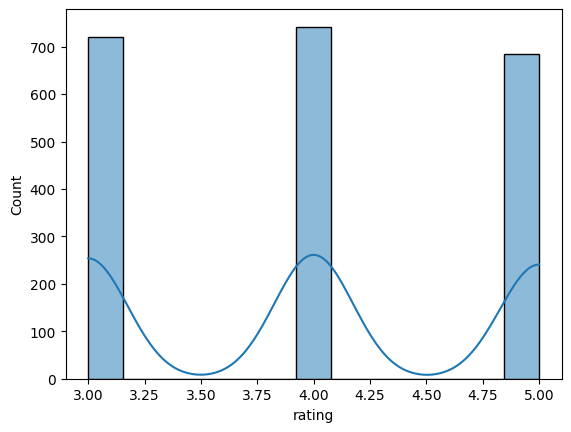

In [36]:
# Data exploration
display(df_ratings.head())
display(df_titles.head())
display(df_users.head())
print(df_ratings.shape, df_titles.shape, df_users.shape)

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_ratings, x='rating', kde=True);

# use these values to determine what data we keep

In [37]:
n_ratings = len(df_ratings)
n_movies = len(df_ratings['show_id'].unique())
n_users = len(df_ratings['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 2147
Number of unique movieId's: 1809
Number of unique users: 200
Average ratings per user: 10.73
Average ratings per movie: 1.19


In [38]:
df_ratings['user_id'].value_counts()

user_id
1      11
120    11
122    11
123    11
125    11
       ..
64      9
67      9
109     9
182     9
132     9
Name: count, Length: 200, dtype: int64

In [39]:
df_ratings['show_id'].value_counts()

show_id
s7748    4
s6508    4
s8804    4
s540     4
s3282    4
        ..
s937     1
s235     1
s3980    1
s1454    1
s8300    1
Name: count, Length: 1809, dtype: int64

In [40]:
df_ratings['show_id'].value_counts().value_counts()

count
1    1514
2     258
3      31
4       6
Name: count, dtype: int64

In [41]:
print('Min:\t\t', df_ratings['show_id'].value_counts().min())
print('Quartile 1:\t', df_ratings['show_id'].value_counts().quantile(.25))
print('Median:\t\t', df_ratings['show_id'].value_counts().quantile(.5))
print('Quartile 3:\t', df_ratings['show_id'].value_counts().quantile(.75))
print('Max:\t\t', df_ratings['show_id'].value_counts().max())
      

Min:		 1
Quartile 1:	 1.0
Median:		 1.0
Quartile 3:	 1.0
Max:		 4


In [42]:
print(f"Duplicate ratings: {df_ratings.duplicated(subset=['user_id', 'show_id']).sum()}")

# If duplicates exist, drop them (keeping the first record)
# df_ratings.drop_duplicates(subset=['userId', 'movieId'], keep='first', inplace=True)

Duplicate ratings: 0


In [43]:
df_titles.isna().sum()

show_id                                                  0
type                                                     0
title                                                    0
director                                              2114
cast                                                   119
country                                                814
release_year                                             0
rating                                                   4
duration                                                 1
description                                              0
Action                                                   0
Adventure                                                0
Anime Series International TV Shows                      0
British TV Shows Docuseries International TV Shows       0
Children                                                 0
Comedies                                                 0
Comedies Dramas International Movies                    

# Data cleaning, prepearation

In [44]:
# Option 2: Drop the column in place (modifying the original DataFrame)
df_titles.drop('director', axis=1, inplace=True)
df_titles.head()

,show_id,type,title,cast,country,release_year,rating,duration,description,Action,...,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,0,...,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,1,...,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,0,...,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,0,...,0,0,0,0,0,0,1,0,0,0


In [45]:
df_titles.dropna(inplace=True)
df_titles.head()

,show_id,type,title,cast,country,release_year,rating,duration,description,Action,...,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,0,...,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,0,...,0,0,0,0,0,0,0,1,0,0
4,s5,TV Show,Kota Factory,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,0,...,0,0,0,0,0,0,1,0,0,0
7,s8,Movie,Sankofa,Kofi Ghanaba Oyafunmike Ogunlano Alexandra Dua...,United States Ghana Burkina Faso United Kingdo...,1993,TV-MA,125 min,On a photo shoot in Ghana an American model sl...,0,...,0,0,0,0,0,0,0,0,0,0
8,s9,TV Show,The Great British Baking Show,Mel Giedroyc Sue Perkins Mary Berry Paul Holly...,United Kingdom,2021,TV-14,9 Seasons,A talented batch of amateur bakers face off in...,0,...,0,0,0,1,0,0,0,0,0,0


In [46]:
df_users.isna().sum()

user_id         0
name            0
phone           0
email           0
age             0
gender          0
Netflix         0
Amazon Prime    0
Disney+         0
Paramount+      0
Max             0
Hulu            0
Apple TV+       0
Peacock         0
city            0
state           0
zip             0
dtype: int64

In [47]:
df_users.drop(columns=['city','state','zip','email','name','phone'])

,user_id,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock
0,1,18,Male,0,0,0,1,0,1,1,0
1,2,51,Female,0,0,1,0,0,0,1,1
2,3,30,Female,0,0,0,1,0,0,0,1
3,4,22,Male,0,1,1,0,1,0,1,1
4,5,40,Female,1,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
195,196,49,Male,0,1,1,1,0,1,0,1
196,197,53,Male,1,0,0,0,0,1,1,1
197,198,64,Female,0,1,1,0,1,0,0,0
198,199,47,Female,1,1,1,1,0,0,1,1


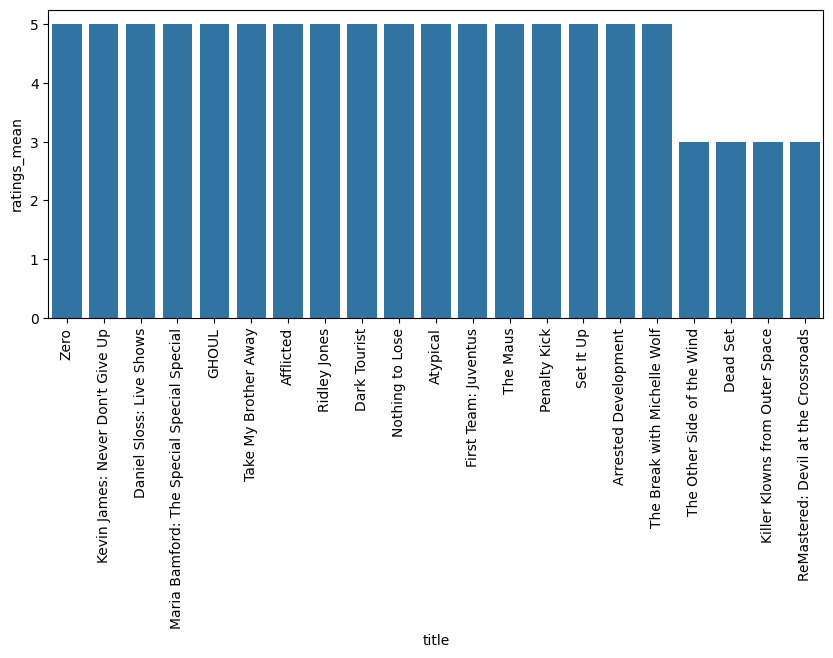

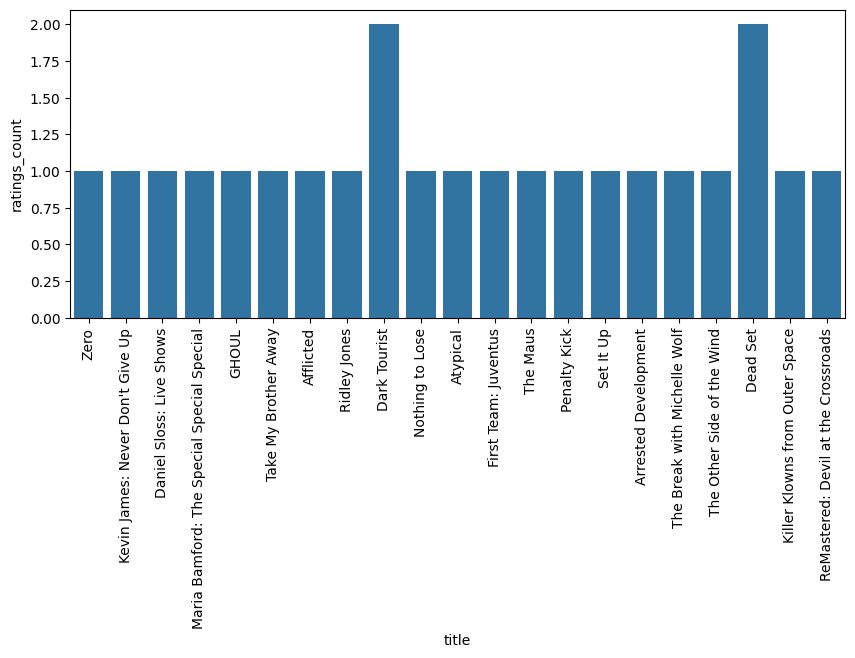

In [14]:
# Visualize the average rating for each movie

# Group the rows into individual titles and calculate the mean rating for each row
movie_stats = df_ratings.groupby(by=['show_id'])[['rating']].agg(['count', 'mean'])
movie_stats.columns = ['ratings_count', 'ratings_mean'] # Rename the columns to simplify the index

# Join with df_titles to get the titles
movie_stats = movie_stats.reset_index().merge(
    df_titles[['show_id', 'title']], 
    on='show_id', 
    how='left'
)

# Sort the ratings
movie_stats = movie_stats.sort_values(by=['ratings_mean'], ascending=False)

# Create a smaller dataset of the top n and bottom n rated movies
df_reduced = pd.concat([movie_stats.head(20), movie_stats.tail(5)])

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_mean')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_count')
plt.xticks(rotation=90)
plt.show()

In [15]:
user_item_matrix = df_ratings.pivot_table(index='user_id', columns='show_id', values='rating')
print(user_item_matrix.head())

show_id  s1004  s1005  s1006  s1007  s1018  s1028  s1037  s1040  s1041  s1060  \
user_id                                                                         
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
4          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
5          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    5.0   

show_id  ...  s962  s966  s968  s973  s977  s98  s985  s988  s990  s994  
user_id  ...                                                             
1        ...   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  
2        ...   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  
3        ...   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   NaN   NaN  
4        ...   NaN   NaN   NaN   NaN   NaN  NaN   NaN   NaN   

In [ ]:
# Make sure that the ratings dataframe includes only the shows that weren't deleted from dropping empty rows
df_ratings = df_ratings[df_ratings['show_id'].isin(df_titles['show_id'])]

# Automation

In [19]:
# Set up matrix and mapper
def create_matrix(df, user, item, rating):
  import numpy as np
  from scipy.sparse import csr_matrix

  U = df[user].nunique()  # Number of users for the matrix
  I = df[item].nunique()  # Number of items for the matrix

  # Map user and movie IDs to matrix indices
  user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
  item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

  # Map matrix indices back to IDs
  user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
  item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

  # Create a list of index values for the csr_matrix for users and movies
  user_index = [user_mapper[i] for i in df[user]]
  item_index = [item_mapper[i] for i in df[item]]

  # Build the final matrix which will look like: (movieId, userId) rating
  X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

  return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [20]:
# Filter by columns to include in model
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_ratings, 'user_id', 'show_id', 'rating')

In [22]:
# How sparse is this matrix?
sparsity = round(1.0 - len(df_ratings) / float(len(user_mapper) * len(item_mapper)), 3)
print('The sparsity level of this matrix is {}%'.format(sparsity * 100))

The sparsity level of this matrix is 99.4%


In [ ]:
# Re run this to make sure recommender can access the correct rows
df_titles = df_titles.set_index('show_id')

# More automation

In [26]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
    from sklearn.neighbors import NearestNeighbors
    import numpy as np

    rec_ids = []                # Make a list for the recommended item IDs we'll get later
    item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
    item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function

    # Fit the clustering algorithm based on the user-item matrix X
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)

    # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
    rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
    rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
    rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
    rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself

    # We need to replace the recommended item indeces with their original item IDs
    for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
        rec_ids.append(item_inv_mapper[rec_indeces[i]])
        
    # It may help to see what this is. The distance list is first and the recommended item indeces are second
    if messages:
        print(f'List of recommended item indeces:\n{rec_indeces}\n')
        print(f'List of recommended item IDs:\n{rec_ids}\n')
        print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')

    # Return two lists: the original item IDs of the recommendations and their similarity scores
    return rec_ids, rec_distances

movie_id = 's1060'
rec_ids, rec_distances = recommend(movie_id, X, item_mapper, item_inv_mapper, k=10, messages=False)
        
print(f"If you like {df_titles.loc[movie_id, 'title']}, you may also enjoy:\n")
df_titles.loc[rec_ids, 'title']

If you like House of Cards, you may also enjoy:



show_id
s8084          Star-Crossed
s5471             Bloodline
s3764       Elisa & Marcela
s3888              Chambers
s3582            MINDHUNTER
s821           The Platform
s2255         The Protector
s2038       Record of Youth
s2175    My Perfect Landing
s473           Ridley Jones
Name: title, dtype: object

In [31]:
# Display all testable showIds
print(list(item_mapper.keys()))

['s1004', 's1005', 's1018', 's1028', 's1037', 's1040', 's1041', 's1060', 's1061', 's1063', 's1068', 's1080', 's1081', 's1085', 's1087', 's1102', 's1109', 's1114', 's1115', 's1119', 's1128', 's1134', 's1138', 's1144', 's1146', 's1147', 's1148', 's115', 's1157', 's116', 's1173', 's1174', 's1187', 's119', 's1191', 's1195', 's1207', 's1211', 's1216', 's1221', 's1231', 's1257', 's1261', 's1269', 's127', 's1276', 's1288', 's1303', 's1306', 's1318', 's1323', 's1325', 's1333', 's1335', 's1336', 's1339', 's1350', 's1357', 's1363', 's1365', 's1366', 's1373', 's1374', 's1377', 's1378', 's1384', 's1402', 's1403', 's1409', 's1416', 's1420', 's1429', 's1430', 's1433', 's1438', 's1448', 's1449', 's1454', 's1455', 's1457', 's146', 's1461', 's1465', 's1466', 's1468', 's1474', 's1479', 's1484', 's1488', 's1492', 's1493', 's1515', 's1517', 's1524', 's1526', 's1530', 's1533', 's1540', 's1547', 's155', 's1553', 's1555', 's1563', 's1567', 's1571', 's1574', 's1580', 's1581', 's1584', 's1594', 's1599', 's1602

# Deployment, using sqlite database

### Deployment on shows first

In [28]:
# Deployment of models for detail page.
# First, collabortive recommender based on movie:
# How many recommendations per movie would you like?
from sqlalchemy import create_engine
k = 5

# Get a list of recommendations for all movies; you can store this list as a "trained model" of sorts
df_recommendations = pd.DataFrame(columns=['If you like'], index=item_mapper)
for i in range(1, k):
    df_recommendations[f'Recommendation {i}'] = None

for row in df_recommendations.itertuples():
    # Get a ranked list of recommendati ons
    rec_ids, rec_distances = recommend(row[0], X, item_mapper, item_inv_mapper, k=k, messages=False)

    # Get the title of the 'watched' movie in this row
    df_recommendations.at[row[0], 'If you like'] = df_titles.at[row[0], 'title']
    
    # Get the titles of the recommended movies
    for i, r in enumerate(rec_ids):
        df_recommendations.at[row[0], f'Recommendation {i+1}'] = df_titles.at[r, 'title']

# Store df_recommendations in an operational DB.

from sqlalchemy import create_engine
engine = create_engine("sqlite:///show_details_recs1.db")

# Now, store your recommendations DataFrame into a table called 'show_details'
df_recommendations.to_sql('show_details', con=engine, if_exists='append', chunksize=1000)

df_recommendations.head()

,If you like,Recommendation 1,Recommendation 2,Recommendation 3,Recommendation 4,Recommendation 5
s1004,Zero,Atelier,Who Killed Little Gregory?,Bondi Rescue,Zero,Ugly Duckling
s1005,Izzy's Koala World,Geronimo Stilton,Savita Damodar Paranjpe,Game Over (Tamil Version),14 Cameras,Medium
s1018,Dhobi Ghat (Mumbai Diaries),The 3rd Eye,7 años,Birthmarked,Atypical,Alejandro Sanz: What I Was Is What I Am
s1028,Crimson Peak,Prom Night,Nagi-Asu: A Lull in the Sea,His House,Head Count,The Boy
s1037,Time Trap,How to Stage a Coup,Doom,The Book of Eli,Tabula Rasa,ReMastered: Devil at the Crossroads


### Deployment based on user

In [33]:
def recommend_for_user(user_id, df_ratings, X, item_mapper, item_inv_mapper, k=10, top_n=10):
    # Step 1: Get user’s highest-rated shows
    df_user_ratings = df_ratings[df_ratings['user_id'] == user_id].sort_values(by='rating', ascending=False)
    max_rating = df_user_ratings['rating'].max()
    df_user_ratings = df_user_ratings[df_user_ratings['rating'] == max_rating]

    # Step 2: Gather recommendations
    recs = {}
    for show_id in df_user_ratings['show_id']:
        rec_ids, rec_distances = recommend(show_id, X, item_mapper, item_inv_mapper, k=k, messages=False)
        for movie, dist in zip(rec_ids, rec_distances):
            if movie not in recs or dist < recs[movie]:  # Save closest distance
                recs[movie] = dist

    # Step 3: Format recommendations
    df_rec_list = pd.DataFrame(list(recs.items()), columns=["show_id", "distance"])
    df_rec_list = df_rec_list.sort_values(by="distance").head(top_n)
    df_rec_list["user_id"] = user_id

    # Step 4: Save to SQLite
    engine = create_engine("sqlite:///collab_userId_top10.db")
    df_rec_list.to_sql('user_recs', con=engine, if_exists='append', index=False)

    return df_rec_list

In [34]:
unique_users = df_ratings['user_id'].unique()

for user_id in unique_users:
    recommend_for_user(user_id, df_ratings, X, item_mapper, item_inv_mapper)